In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',150)

In [2]:
df = pd.read_csv('categories.csv')

In [3]:
df.shape

(7549, 37)

In [4]:
df.head(2)

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,calendar_updated,calendar_last_scraped,first_review,last_review,cancellation_policy
0,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,within a few hours,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...","Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,730702,Singapore,Singapore,SG,Singapore,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",64 months ago,2019-09-25,2013-10-21,2013-10-21,flexible
1,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,Bukit Timah,"['email', 'phone', 'facebook', 'reviews', 'off...","Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,589664,Singapore,Singapore,SG,Singapore,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",62 months ago,2019-09-25,2014-04-18,2014-12-26,moderate


In [5]:
df.nunique().sort_values()

country_code                       1
calendar_last_scraped              1
experiences_offered                1
country                            1
market                             3
room_type                          4
host_response_time                 4
neighbourhood_group_cleansed       5
bed_type                           5
cancellation_policy                6
property_type                     24
neighbourhood_cleansed            42
neighbourhood                     42
city                              44
smart_location                    45
host_neighbourhood                58
calendar_updated                  81
street                           105
host_verifications               193
host_location                    222
last_review                      988
host_about                      1261
host_since                      1603
first_review                    1643
host_name                       1777
interaction                     1840
notes                           1867
z

# columns to be removed: 
name	summary	space	description (text columns)

**#singe entries to be dropped**
country_code                       1
calendar_last_scraped              1
experiences_offered                1
country                            1
city
market- all singapore entries
country
smart_location
bed_type - 99% entries real bed rest are distributed in 5 others


# paragraphs text
notes
transit
neighborhood_overview
access
interaction
house_rules
host_about

# remove -
host_location	 singapore is written in diff patterns, street

**binning for**
host_names max-100, 100-50,50-min based on freq of listing
host_since = no of months
host_verifications
property_type less than 10 will be others
amenities

**Nul value treat**
host_reponse_time has null values and for that respective host have single entry

**neighbor**
neighbourhood_cleansed            42
neighbourhood                     42
host_neighbourhood                58 - almost 50% data is similar to each columns

**confused**
calendar_updated
first& last reviews

In [6]:
# data containing single entries

df=df.drop(['calendar_last_scraped', 'experiences_offered', 'country',
       'country_code', 'market','smart_location','bed_type'],axis=1)
df.head(2)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,property_type,room_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
0,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,within a few hours,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...","Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,730702,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",64 months ago,2013-10-21,2013-10-21,flexible
1,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,Bukit Timah,"['email', 'phone', 'facebook', 'reviews', 'off...","Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,589664,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",62 months ago,2014-04-18,2014-12-26,moderate


In [7]:
df=df.drop(['notes','transit','neighborhood_overview','access','interaction','house_rules','host_about'],axis=1)
df.head(2)

,name,summary,space,description,host_name,host_since,host_location,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,property_type,room_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
0,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,Francesca,2010-10-20,singapore,within a few hours,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...","Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,730702,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",64 months ago,2013-10-21,2013-10-21,flexible
1,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,Sujatha,2010-09-08,"Singapore, Singapore",NaN,Bukit Timah,"['email', 'phone', 'facebook', 'reviews', 'off...","Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,589664,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",62 months ago,2014-04-18,2014-12-26,moderate


In [8]:
df=df.drop(['name','summary','space','description'],axis=1)
df.head(2)

,host_name,host_since,host_location,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,property_type,room_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
0,Francesca,2010-10-20,singapore,within a few hours,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...","Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,730702,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",64 months ago,2013-10-21,2013-10-21,flexible
1,Sujatha,2010-09-08,"Singapore, Singapore",NaN,Bukit Timah,"['email', 'phone', 'facebook', 'reviews', 'off...","Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,589664,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",62 months ago,2014-04-18,2014-12-26,moderate


In [9]:
df.isna().sum()

host_name                          1
host_since                         1
host_location                     19
host_response_time              1364
host_neighbourhood               910
host_verifications                 0
street                             0
neighbourhood                      3
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
city                              75
zipcode                          818
property_type                      0
room_type                          0
amenities                          0
calendar_updated                   0
first_review                    2550
last_review                     2550
cancellation_policy                0
dtype: int64

In [10]:
df[df.host_neighbourhood.isna()][['host_name','host_neighbourhood','neighbourhood','neighbourhood_cleansed',
   'neighbourhood_group_cleansed','property_type','room_type']]

,host_name,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type
23,Susan,NaN,Tampines,Tampines,East Region,Apartment,Private room
39,Jenny,NaN,Queenstown,Queenstown,Central Region,Apartment,Private room
45,Laura,NaN,Bukit Merah,Bukit Merah,Central Region,Condominium,Private room
55,Natesh,NaN,Hougang,Hougang,North-East Region,Condominium,Private room
91,Takico,NaN,Novena,Novena,Central Region,Guest suite,Private room
107,Skye,NaN,Choa Chu Kang,Choa Chu Kang,West Region,House,Private room
115,Jin,NaN,Bedok,Bedok,East Region,House,Private room
116,Jin,NaN,Bedok,Bedok,East Region,House,Private room
120,Jin,NaN,Bedok,Bedok,East Region,House,Private room
124,Skye,NaN,Choa Chu Kang,Choa Chu Kang,West Region,Condominium,Entire home/apt


In [11]:
df.head(2)

,host_name,host_since,host_location,host_response_time,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,property_type,room_type,amenities,calendar_updated,first_review,last_review,cancellation_policy
0,Francesca,2010-10-20,singapore,within a few hours,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...","Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,730702,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",64 months ago,2013-10-21,2013-10-21,flexible
1,Sujatha,2010-09-08,"Singapore, Singapore",NaN,Bukit Timah,"['email', 'phone', 'facebook', 'reviews', 'off...","Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,589664,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",62 months ago,2014-04-18,2014-12-26,moderate


In [12]:
df = df.drop(['calendar_updated','last_review','first_review','host_location','street','city','zipcode','neighbourhood','host_neighbourhood'],axis=1)
df.head(2)

,host_name,host_since,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,cancellation_policy
0,Francesca,2010-10-20,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'jum...",Woodlands,North Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",flexible
1,Sujatha,2010-09-08,NaN,"['email', 'phone', 'facebook', 'reviews', 'off...",Bukit Timah,Central Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate


In [13]:
df.isna().sum()

host_name                          1
host_since                         1
host_response_time              1364
host_verifications                 0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
amenities                          0
cancellation_policy                0
dtype: int64

In [14]:
df.head(2)

,host_name,host_since,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,cancellation_policy
0,Francesca,2010-10-20,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'jum...",Woodlands,North Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",flexible
1,Sujatha,2010-09-08,NaN,"['email', 'phone', 'facebook', 'reviews', 'off...",Bukit Timah,Central Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate


In [15]:
df.host_since = pd.to_datetime(df.host_since)

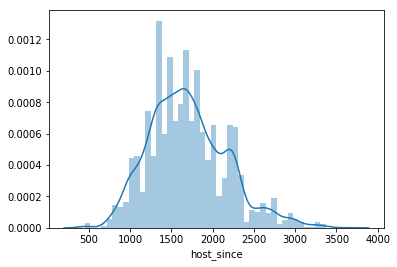

In [48]:
# sns.distplot(l[l.dropna()])

In [16]:
current = datetime.date.today()
df['host_vintage'] = df.host_since.apply(lambda x: (current - x.date()).days)
df.head(2)

,host_name,host_since,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,cancellation_policy,host_vintage
0,Francesca,2010-10-20,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'jum...",Woodlands,North Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",flexible,3317.0
1,Sujatha,2010-09-08,NaN,"['email', 'phone', 'facebook', 'reviews', 'off...",Bukit Timah,Central Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,3359.0


In [17]:
df.isna().sum()

host_name                          1
host_since                         1
host_response_time              1364
host_verifications                 0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
amenities                          0
cancellation_policy                0
host_vintage                       1
dtype: int64

In [18]:
df.host_vintage.fillna(df.host_vintage.mean(),inplace=True)

In [19]:
df.drop('host_since',axis=1,inplace=True)
df.head(2)

,host_name,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,cancellation_policy,host_vintage
0,Francesca,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'jum...",Woodlands,North Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",flexible,3317.0
1,Sujatha,NaN,"['email', 'phone', 'facebook', 'reviews', 'off...",Bukit Timah,Central Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,3359.0


    Amenities and host_verifications

In [20]:
dct = {}
for i in df.amenities:
    j = i[1:-1:].split(",")
    for k in j:
        if k in dct.keys():
            dct[k] +=1
        else:
            dct[k] = 1
dct

{'TV': 5535,
 '"Cable TV"': 1138,
 'Internet': 1784,
 'Wifi': 7274,
 '"Air conditioning"': 7278,
 '"Pets live on this property"': 137,
 'Cat(s)': 35,
 'Elevator': 5297,
 'Washer': 6782,
 'Pool': 3832,
 'Kitchen': 6241,
 'Gym': 3166,
 '"Family/kid friendly"': 2181,
 'Essentials': 6604,
 'Shampoo': 5406,
 'Dryer': 4909,
 '"Free street parking"': 534,
 '"Hot tub"': 672,
 '"Smoke detector"': 2840,
 '"Fire extinguisher"': 2625,
 '"Lock on bedroom door"': 4289,
 'Hangers': 6175,
 '"Hair dryer"': 5531,
 'Iron': 5692,
 '"Laptop friendly workspace"': 5250,
 '"Self check-in"': 1492,
 'Keypad': 551,
 '"Private entrance"': 2005,
 '"Children’s books and toys"': 128,
 '"Hot water"': 4164,
 '"Luggage dropoff allowed"': 1649,
 '"Long term stays allowed"': 3061,
 '"Pets allowed"': 1461,
 'Dog(s)': 55,
 '"Paid parking on premises"': 951,
 'Heating': 2445,
 '"First aid kit"': 1928,
 '"Paid parking off premises"': 1360,
 '"translation missing: en.hosting_amenity_50"': 807,
 '"Bed linens"': 2062,
 '"Extra 

In [21]:
amenities = pd.DataFrame(dct.values(),index=dct.keys()).sort_values(0,ascending=False).reset_index().rename({"index":"amenities",
                                                                                                0:"frequencies"},axis=1)

In [22]:
amenities["perc"] = amenities.frequencies/len(df)

In [23]:
amenities.perc.describe()

count    127.000000
mean       0.172119
std        0.245744
min        0.000132
25%        0.010531
50%        0.063055
75%        0.222414
max        0.964101
Name: perc, dtype: float64

In [24]:
amenities

,amenities,frequencies,perc
0,"""Air conditioning""",7278,0.964101
1,Wifi,7274,0.963571
2,Washer,6782,0.898397
3,Essentials,6604,0.874818
4,Kitchen,6241,0.826732
5,Hangers,6175,0.817989
6,Iron,5692,0.754007
7,TV,5535,0.733210
8,"""Hair dryer""",5531,0.732680
9,Shampoo,5406,0.716121


In [25]:
amenities['category'] = pd.cut(amenities.perc,bins=[0.0,0.05,0.2,0.6,1],labels=['Extras','Premium','Moderate','Basic'])

In [26]:
amenities['weight'] = amenities.category.replace(['Extras','Premium','Moderate','Basic'],[0,3,2,1])
amenities

,amenities,frequencies,perc,category,weight
0,"""Air conditioning""",7278,0.964101,Basic,1
1,Wifi,7274,0.963571,Basic,1
2,Washer,6782,0.898397,Basic,1
3,Essentials,6604,0.874818,Basic,1
4,Kitchen,6241,0.826732,Basic,1
5,Hangers,6175,0.817989,Basic,1
6,Iron,5692,0.754007,Basic,1
7,TV,5535,0.733210,Basic,1
8,"""Hair dryer""",5531,0.732680,Basic,1
9,Shampoo,5406,0.716121,Basic,1


In [27]:
basic = list(amenities[amenities.category=='Basic'].amenities)
extras = list(amenities[amenities.category=='Extras'].amenities)
moderate = list(amenities[amenities.category=='Moderate'].amenities)
premium = list(amenities[amenities.category=='Premium'].amenities)

In [28]:
def f(x):
    
    sigma=0
    l = 0
    global s
    for i in x[1:-1].split(','):
        if i in premium:
            sigma+=3
        elif i in extras:
            sigma+=0
        elif i in moderate:
            sigma+=2
        else:
            sigma+=1
        l+=1
    return round(float(sigma/l),2)
        
df["amenities_score"] = df.amenities.apply(f)
df.head(2)

,host_name,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,cancellation_policy,host_vintage,amenities_score
0,Francesca,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'jum...",Woodlands,North Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",flexible,3317.0,1.11
1,Sujatha,NaN,"['email', 'phone', 'facebook', 'reviews', 'off...",Bukit Timah,Central Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,3359.0,1.46


In [29]:
df.host_verifications[0][1:-1].split(',')

["'email'",
 " 'phone'",
 " 'facebook'",
 " 'reviews'",
 " 'jumio'",
 " 'offline_government_id'",
 " 'selfie'",
 " 'government_id'",
 " 'identity_manual'"]

In [30]:
dct = {}
for i in df.host_verifications:
    j = i[1:-1].split(",")
    for k in j:
        if len(k)>1 and k[0]==' ':      # multiple entries having leading space
            k=k[1:]
        if k in dct.keys():
            dct[k] +=1
        else:
            dct[k] = 1
dct

{"'email'": 6960,
 "'phone'": 7508,
 "'facebook'": 601,
 "'reviews'": 4836,
 "'jumio'": 3940,
 "'offline_government_id'": 3224,
 "'selfie'": 2747,
 "'government_id'": 5332,
 "'identity_manual'": 2502,
 "'work_email'": 998,
 "'manual_offline'": 102,
 '': 19,
 "'kba'": 21,
 "'manual_online'": 27,
 "'google'": 425,
 "'weibo'": 180,
 "'zhima_selfie'": 55,
 "'sesame'": 6,
 "'sesame_offline'": 6,
 'on': 1}

In [31]:
verif = pd.DataFrame(dct.values(),index=dct.keys()).sort_values(0,ascending=False).reset_index().rename({"index":"verif",
                                                                                                0:"frequencies"},axis=1)
verif

,verif,frequencies
0,'phone',7508
1,'email',6960
2,'government_id',5332
3,'reviews',4836
4,'jumio',3940
5,'offline_government_id',3224
6,'selfie',2747
7,'identity_manual',2502
8,'work_email',998
9,'facebook',601


In [32]:
verif["perc"] = verif.frequencies/len(df)
verif

,verif,frequencies,perc
0,'phone',7508,0.994569
1,'email',6960,0.921976
2,'government_id',5332,0.706319
3,'reviews',4836,0.640615
4,'jumio',3940,0.521923
5,'offline_government_id',3224,0.427076
6,'selfie',2747,0.363889
7,'identity_manual',2502,0.331435
8,'work_email',998,0.132203
9,'facebook',601,0.079613


In [33]:
verif['category'] = pd.cut(verif.perc,bins=[0.0,0.25,0.7,1],labels=['Extras','Complementary','Necessary'])
verif

,verif,frequencies,perc,category
0,'phone',7508,0.994569,Necessary
1,'email',6960,0.921976,Necessary
2,'government_id',5332,0.706319,Necessary
3,'reviews',4836,0.640615,Complementary
4,'jumio',3940,0.521923,Complementary
5,'offline_government_id',3224,0.427076,Complementary
6,'selfie',2747,0.363889,Complementary
7,'identity_manual',2502,0.331435,Complementary
8,'work_email',998,0.132203,Extras
9,'facebook',601,0.079613,Extras


In [34]:
necessary = list(verif[verif.category=='Necessary'].verif)
complementary = list(verif[verif.category=='Complementary'].verif)
extras = list(verif[verif.category=='Extras'].verif)

In [35]:
def f(x):
    sigma=0
    l = 0
    global s
    for i in x[1:-1].split(','):
        if len(i)>1 and i[0]==' ':      # multiple entries having leading space
            i=i[1:]
        if i in extras:
            sigma+=0
        elif i in complementary:
            sigma+=1
        else:
            sigma+=2
        l+=1
    return round(float(sigma/l),2)
        
df["verification_score"] = df.host_verifications.apply(f)
df.head(2)

,host_name,host_response_time,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,cancellation_policy,host_vintage,amenities_score,verification_score
0,Francesca,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'jum...",Woodlands,North Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",flexible,3317.0,1.11,1.22
1,Sujatha,NaN,"['email', 'phone', 'facebook', 'reviews', 'off...",Bukit Timah,Central Region,Apartment,Private room,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,3359.0,1.46,1.12


In [36]:
df = df.drop(['host_verifications','amenities'],axis=1)
df.head(2)

,host_name,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score
0,Francesca,within a few hours,Woodlands,North Region,Apartment,Private room,flexible,3317.0,1.11,1.22
1,Sujatha,NaN,Bukit Timah,Central Region,Apartment,Private room,moderate,3359.0,1.46,1.12


    host_response_time

In [37]:
df.host_response_time.value_counts()

within an hour        4045
within a few hours    1254
within a day           623
a few days or more     263
Name: host_response_time, dtype: int64

In [38]:
df.isna().sum()

host_name                          1
host_response_time              1364
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
property_type                      0
room_type                          0
cancellation_policy                0
host_vintage                       0
amenities_score                    0
verification_score                 0
dtype: int64

In [39]:
n = df[df.host_response_time.isna()].iloc[:,:2]
n.head()

,host_name,host_response_time
1,Sujatha,NaN
18,Aresha,NaN
21,Adi,NaN
23,Susan,NaN
25,Frederic,NaN


In [40]:
l=[]
u=[]
for i in n['host_name']:
    if df[df.host_name==i]['host_response_time'].notna().sum()>0:
        l.append(i)
    else:
        u.append(i)

In [41]:
df[df.host_name==l[0]]

,host_name,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score
28,Roger,NaN,Rochor,Central Region,Apartment,Private room,strict_14_with_grace_period,2658.0,1.69,2.00
365,Roger,NaN,Choa Chu Kang,West Region,Apartment,Entire home/apt,strict_14_with_grace_period,1767.0,1.56,1.67
5347,Roger,within a few hours,Pasir Ris,East Region,Condominium,Entire home/apt,flexible,909.0,1.45,1.14


In [42]:
for i in n.index:
    name = df.loc[i].host_name
    if name in l:
        df.host_response_time.loc[i] = df[df.host_name==name].host_response_time.mode()[0]
        

/Users/macbookair/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
df[df.host_name==l[0]]

,host_name,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score
28,Roger,within a few hours,Rochor,Central Region,Apartment,Private room,strict_14_with_grace_period,2658.0,1.69,2.00
365,Roger,within a few hours,Choa Chu Kang,West Region,Apartment,Entire home/apt,strict_14_with_grace_period,1767.0,1.56,1.67
5347,Roger,within a few hours,Pasir Ris,East Region,Condominium,Entire home/apt,flexible,909.0,1.45,1.14


In [44]:
df.head()

,host_name,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score
0,Francesca,within a few hours,Woodlands,North Region,Apartment,Private room,flexible,3317.0,1.11,1.22
1,Sujatha,NaN,Bukit Timah,Central Region,Apartment,Private room,moderate,3359.0,1.46,1.12
2,Francesca,within a few hours,Woodlands,North Region,Apartment,Private room,flexible,3317.0,1.00,1.22
3,Belinda,within a few hours,Tampines,East Region,Villa,Private room,moderate,3216.0,1.54,1.00
4,Belinda,within a few hours,Tampines,East Region,House,Private room,moderate,3216.0,1.68,1.00


In [45]:
df.isna().sum()

host_name                         1
host_response_time              897
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
property_type                     0
room_type                         0
cancellation_policy               0
host_vintage                      0
amenities_score                   0
verification_score                0
dtype: int64

In [46]:
df.host_response_time.value_counts(normalize=True)

within an hour        0.644317
within a few hours    0.205803
within a day          0.105683
a few days or more    0.044197
Name: host_response_time, dtype: float64

In [47]:
x = pd.get_dummies(df.iloc[:,3:])
y = df.host_response_time

In [48]:
xtrain = x[df.host_response_time.notna()].iloc[:,3:]
xtest = x[df.host_response_time.isna()].iloc[:,3:]

In [49]:
ytrain = y[df.host_response_time.notna()]

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
pred = knn.predict(xtest)

In [53]:
pd.Series(pred).value_counts(normalize=True)

within an hour        0.400223
within a day          0.306577
a few days or more    0.207358
within a few hours    0.085842
dtype: float64

In [54]:
l=list(xtest.index)
for i,j in enumerate(pred):
    df.host_response_time.iloc[l[i]] = j

/Users/macbookair/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
df.isna().sum()

host_name                       1
host_response_time              0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
cancellation_policy             0
host_vintage                    0
amenities_score                 0
verification_score              0
dtype: int64

In [56]:
df = df.drop('host_name',axis=1)
df.head()

,host_response_time,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score
0,within a few hours,Woodlands,North Region,Apartment,Private room,flexible,3317.0,1.11,1.22
1,within an hour,Bukit Timah,Central Region,Apartment,Private room,moderate,3359.0,1.46,1.12
2,within a few hours,Woodlands,North Region,Apartment,Private room,flexible,3317.0,1.00,1.22
3,within a few hours,Tampines,East Region,Villa,Private room,moderate,3216.0,1.54,1.00
4,within a few hours,Tampines,East Region,House,Private room,moderate,3216.0,1.68,1.00


In [57]:
x = df.neighbourhood_cleansed.value_counts()
x

Kallang                    1017
Geylang                     969
Novena                      533
Rochor                      495
Outram                      459
Downtown Core               400
Bukit Merah                 389
Bedok                       354
River Valley                351
Queenstown                  265
Tanglin                     183
Marine Parade               177
Singapore River             165
Jurong West                 145
Newton                      131
Bukit Timah                 130
Orchard                     127
Jurong East                 115
Clementi                    109
Hougang                     107
Toa Payoh                   100
Serangoon                    75
Tampines                     70
Woodlands                    66
Museum                       66
Pasir Ris                    65
Choa Chu Kang                63
Bukit Batok                  57
Sengkang                     56
Bishan                       54
Ang Mo Kio                   50
Yishun  

In [58]:
list(x[x.values>=600].index)

['Kallang', 'Geylang']

In [59]:
lessthan100 = list(x[x.values<100].index)
lessthan600 = list(x[(x.values<600) & (x.values>=100)].index)
morethan600 = list(x[x.values>=600].index)

In [60]:
def f(x):
    if x in lessthan100:
        return 'less than 100 listings'
    elif x in lessthan600:
        return 'less than 600 listings'
    else:
        return 'more than 600 listings'

df['neighbourhood_new'] = df.neighbourhood_cleansed.apply(f)

In [61]:
df = df.drop('neighbourhood_cleansed',axis=1)
df.head()

,host_response_time,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score,neighbourhood_new
0,within a few hours,North Region,Apartment,Private room,flexible,3317.0,1.11,1.22,less than 100 listings
1,within an hour,Central Region,Apartment,Private room,moderate,3359.0,1.46,1.12,less than 600 listings
2,within a few hours,North Region,Apartment,Private room,flexible,3317.0,1.00,1.22,less than 100 listings
3,within a few hours,East Region,Villa,Private room,moderate,3216.0,1.54,1.00,less than 100 listings
4,within a few hours,East Region,House,Private room,moderate,3216.0,1.68,1.00,less than 100 listings


In [62]:
x = df.property_type.value_counts()

In [63]:
prop = pd.DataFrame(x).reset_index().rename({"index":"property_type",'property_type':"frequencies"},axis=1)
prop['perc'] = prop.frequencies/len(df)
prop

,property_type,frequencies,perc
0,Apartment,3285,0.435157
1,Condominium,1913,0.253411
2,Serviced apartment,874,0.115777
3,House,461,0.061068
4,Hostel,278,0.036826
5,Townhouse,126,0.016691
6,Boutique hotel,118,0.015631
7,Loft,105,0.013909
8,Hotel,100,0.013247
9,Bed and breakfast,68,0.009008


In [64]:
prop['category'] = pd.cut(prop.perc,bins=[0,0.01,0.1,1],labels=['rare','uncommon','common'])
prop

,property_type,frequencies,perc,category
0,Apartment,3285,0.435157,common
1,Condominium,1913,0.253411,common
2,Serviced apartment,874,0.115777,common
3,House,461,0.061068,uncommon
4,Hostel,278,0.036826,uncommon
5,Townhouse,126,0.016691,uncommon
6,Boutique hotel,118,0.015631,uncommon
7,Loft,105,0.013909,uncommon
8,Hotel,100,0.013247,uncommon
9,Bed and breakfast,68,0.009008,rare


In [65]:
rare = list(prop[prop.category=='rare'].property_type)
uncommon = list(prop[prop.category=='uncommon'].property_type)
common = list(prop[prop.category=='common'].property_type)

In [ ]:
df.head()

In [66]:
def f(x):
    if x in common :
        return 'common'
    elif x in uncommon:
        return 'uncommon'
    else:
        return 'rare'
# prop['category'] = 
df['property_category'] = df.property_type.apply(f)

In [67]:
df.head()

,host_response_time,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,host_vintage,amenities_score,verification_score,neighbourhood_new,property_category
0,within a few hours,North Region,Apartment,Private room,flexible,3317.0,1.11,1.22,less than 100 listings,common
1,within an hour,Central Region,Apartment,Private room,moderate,3359.0,1.46,1.12,less than 600 listings,common
2,within a few hours,North Region,Apartment,Private room,flexible,3317.0,1.00,1.22,less than 100 listings,common
3,within a few hours,East Region,Villa,Private room,moderate,3216.0,1.54,1.00,less than 100 listings,rare
4,within a few hours,East Region,House,Private room,moderate,3216.0,1.68,1.00,less than 100 listings,uncommon


In [68]:
df = df.drop('property_type',axis=1)
df.head()

,host_response_time,neighbourhood_group_cleansed,room_type,cancellation_policy,host_vintage,amenities_score,verification_score,neighbourhood_new,property_category
0,within a few hours,North Region,Private room,flexible,3317.0,1.11,1.22,less than 100 listings,common
1,within an hour,Central Region,Private room,moderate,3359.0,1.46,1.12,less than 600 listings,common
2,within a few hours,North Region,Private room,flexible,3317.0,1.00,1.22,less than 100 listings,common
3,within a few hours,East Region,Private room,moderate,3216.0,1.54,1.00,less than 100 listings,rare
4,within a few hours,East Region,Private room,moderate,3216.0,1.68,1.00,less than 100 listings,uncommon


In [69]:
x = df.cancellation_policy.value_counts()
x

strict_14_with_grace_period    4920
flexible                       1561
moderate                       1051
super_strict_30                  15
strict                            1
super_strict_60                   1
Name: cancellation_policy, dtype: int64

In [70]:
policy = pd.DataFrame(x).reset_index().rename({"index":"policy",'cancellation_policy':"frequencies"},axis=1)
policy['perc'] = policy.frequencies/len(df)
policy

,policy,frequencies,perc
0,strict_14_with_grace_period,4920,0.651742
1,flexible,1561,0.206782
2,moderate,1051,0.139224
3,super_strict_30,15,0.001987
4,strict,1,0.000132
5,super_strict_60,1,0.000132


In [71]:
others = list(policy[policy.perc<0.1].policy)

In [72]:
rare = list(prop[prop.category=='rare'].property_type)
uncommon = list(prop[prop.category=='uncommon'].property_type)
common = list(prop[prop.category=='common'].property_type)

In [73]:
def f(x):
    if x in others :
        return 'others'
    return x

df.cancellation_policy = df.cancellation_policy.apply(f)

In [74]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    4920
flexible                       1561
moderate                       1051
others                           17
Name: cancellation_policy, dtype: int64

In [75]:
pd.get_dummies(df)

,host_vintage,amenities_score,verification_score,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_others,cancellation_policy_strict_14_with_grace_period,neighbourhood_new_less than 100 listings,neighbourhood_new_less than 600 listings,neighbourhood_new_more than 600 listings,property_category_common,property_category_rare,property_category_uncommon
0,3317.0,1.11,1.22,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,3359.0,1.46,1.12,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,3317.0,1.00,1.22,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,3216.0,1.54,1.00,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,3216.0,1.68,1.00,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5,3216.0,1.58,1.00,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
6,3216.0,1.60,1.00,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
7,3008.0,1.75,1.29,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
8,3008.0,1.73,1.29,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
9,3008.0,1.76,1.29,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [76]:
df.to_csv('categorical_ready.csv',index=False) # save cat file n then will merge and build models with num file